## 밑바닥부터 시작하는 딥러닝(Deep Learning from Scratch) 챕터별 예제코드 정리 
예제코드가 기본이나 정확히 일치하지는 않습니다. 개인적으로 모든 코드들을 문서화하되 너무 기본적인 내용은 제외하거나 나름대로 더 필요하다고 생각되는 내용은 추가하였습니다. 같은 내용을 다른 방식으로 구현하는 경우도 있습니다.
## Chapter 6. 학습 관련 기술들
### 6.4 Overfitting and solution
### 6.4.1 Weight decay for overfitting
Overfitting은 주로 내가 학습하고자하는 모형의 capacity의 비해 데이터의 양이 부족한 경우에 나타나는 현상이다. 또한 모형의 capacity가 높을수록 Overfitting이 발생할 가능성이 크다. Overfitting이 발생하면 Generalization 관점에서 성능이 매우 떨어진다. 아래의 그림을 보면 training accuracy의 경우 100%에 달하지만 test accuracy의 경우 training accuracy에 비해 많이 낮음을 볼 수 있는 데, 이는 모형의 일반화 성능이 부족함을 나타낸다.

### Load modules & library

In [1]:
import numpy as np
import matplotlib.pylab as plt
import os, sys
os.chdir('D:\\dev\\sample-code-from-Deep-learning-from-scratch-master')
sys.path.append(os.getcwd())
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

### Load mnist and pre-process mnist for overfitting example

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
x_train = x_train[:300]
t_train = t_train[:300]

In [3]:
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        #print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

### Visualization for overfitting example

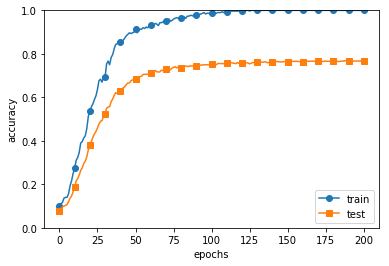

In [4]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### Weight decay
이 예제에서는 overfitting을 방지하기위한 weight decay 방법론 중 하나로 L2-norm penalty로 loss function에 더하는 것만 다룬다. 아래식의 lambda는 hyper-parameter로 연구자가 직접 grid-search 등의 방법론을 이용하여 정해야한다.  

$${L(W)} +{1 \over 2} {\lambda}  {\lVert W \rVert}^2 $$

In [5]:
weight_decay_lambda = 0.1
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list_decay = []
train_acc_list_decay = []
test_acc_list_decay = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list_decay.append(train_acc)
        test_acc_list_decay.append(test_acc)

      #  print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

### Visualization (weight decay applied)

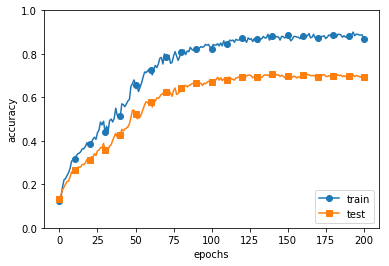

In [6]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list_decay, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list_decay, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### Visualization "Overfitting" vs "Weight decay applied"
weight decay를 적용한 결과 training accuracy와 test accuracy간의 차이가 줄어든 것을 볼 수 있다. weight decay를 적용한 경우 training accuracy가 100%가 아님을 확인할 수 있고 위의 언급한 차이가 줄어듦에 따라 overfitting을 어느정도 방지하였음을 확인할 수 있다. 아래의 예제에서는 비록 weight decay를 적용 후 test accuracy가 올라가지는 않았지만 실험적인 결과로 overfitting을 방지하면 unseen data에 대한 accuracy 소폭 증가함이 많은 실험결과로 나타났다.

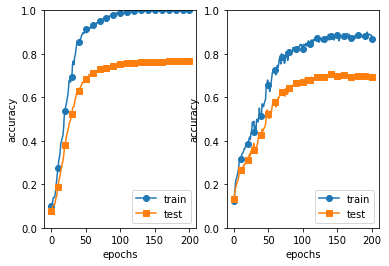

In [7]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')

fig.add_subplot(1,2,2)
plt.plot(x, train_acc_list_decay, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list_decay, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()